# **About Dataset**

**About**

> **Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
> Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
> Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
> People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help**

**Columns**

* age: age of patient
* anaemia: True(1) / False(0)
* creatinine_phosphokinase
* diabetes: True(1) / False(0)
* ejection_fraction: is the volumetric fraction (or portion of the total) of fluid
* high_blood_pressure: True(1) / False(0)
* platelets: a component of blood whose function
* serum_creatinine: Creatinine test
* serum_sodium: sodium levels(mEq/L)
* sex: Male(1) / Female(0)
* smoking: True(1) / False(0)
* time
* DEATH_EVENT: True(1) / False(0) **[TARGET]**

**Target**

- **Exploratory Data Analysis**
- **Build Predictive Model**

# 1) Data Understanding

**Importing Packages**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [2]:
path = '/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(path)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Data Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# 2) Data Preparation

**Unique Values in every columns**

In [4]:
for col in df.columns:
    print(f'{col}, {len(df[col].unique())}')

age, 47
anaemia, 2
creatinine_phosphokinase, 208
diabetes, 2
ejection_fraction, 17
high_blood_pressure, 2
platelets, 176
serum_creatinine, 40
serum_sodium, 27
sex, 2
smoking, 2
time, 148
DEATH_EVENT, 2


**Categorical DATA :** 

anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT 
**(YES(1) / NO(0))**



**Numirical DATA :** 

age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time

In [5]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

**Summary statistics**

In [6]:
df[num_cols].describe().T[['min', '50%','max']].rename(columns={'50%':'avg'})

,min,avg,max
age,40.0,60.0,95.0
creatinine_phosphokinase,23.0,250.0,7861.0
ejection_fraction,14.0,38.0,80.0
platelets,25100.0,262000.0,850000.0
serum_creatinine,0.5,1.1,9.4
serum_sodium,113.0,137.0,148.0
time,4.0,115.0,285.0


# 3) Exploratory Data Analysis

**Count plot of categorical features**

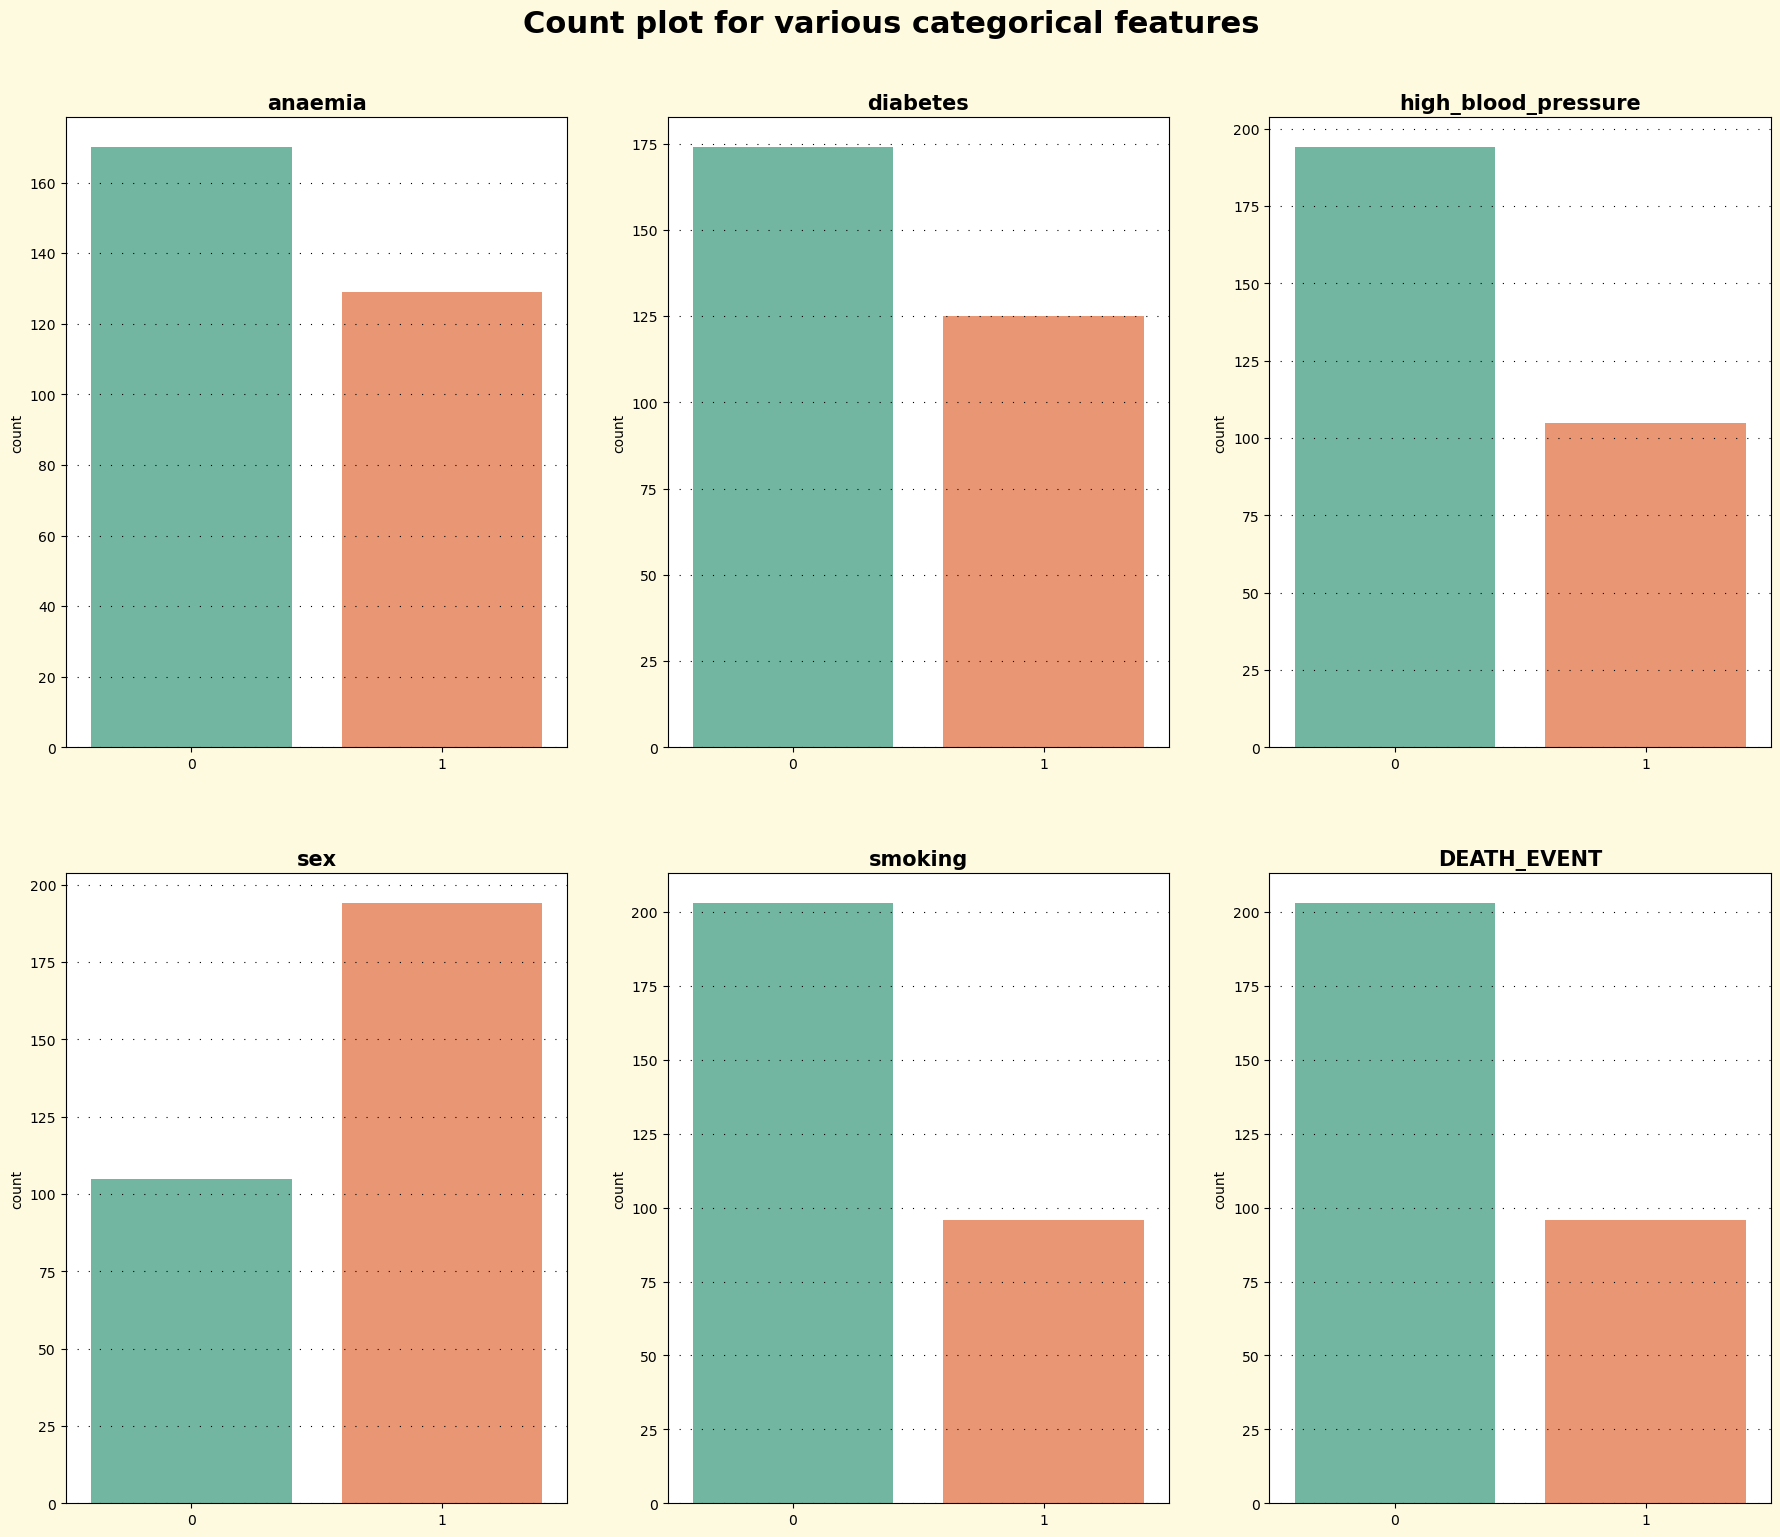

In [7]:
def plot_cate_feat(df, ax, col_name):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
    sns.countplot(ax=ax,data=df,x=col_name,palette = 'Set2')
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(2,3)
axes = []

for i in range(2): # 0, 1
    for j in range(3): # 0, 1, 2
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)


fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")

for ax,col_name in zip(axes,cat_cols):
    plot_cate_feat(df, ax, col_name)


plt.show()

**Distribution of continuous features according to target variable**

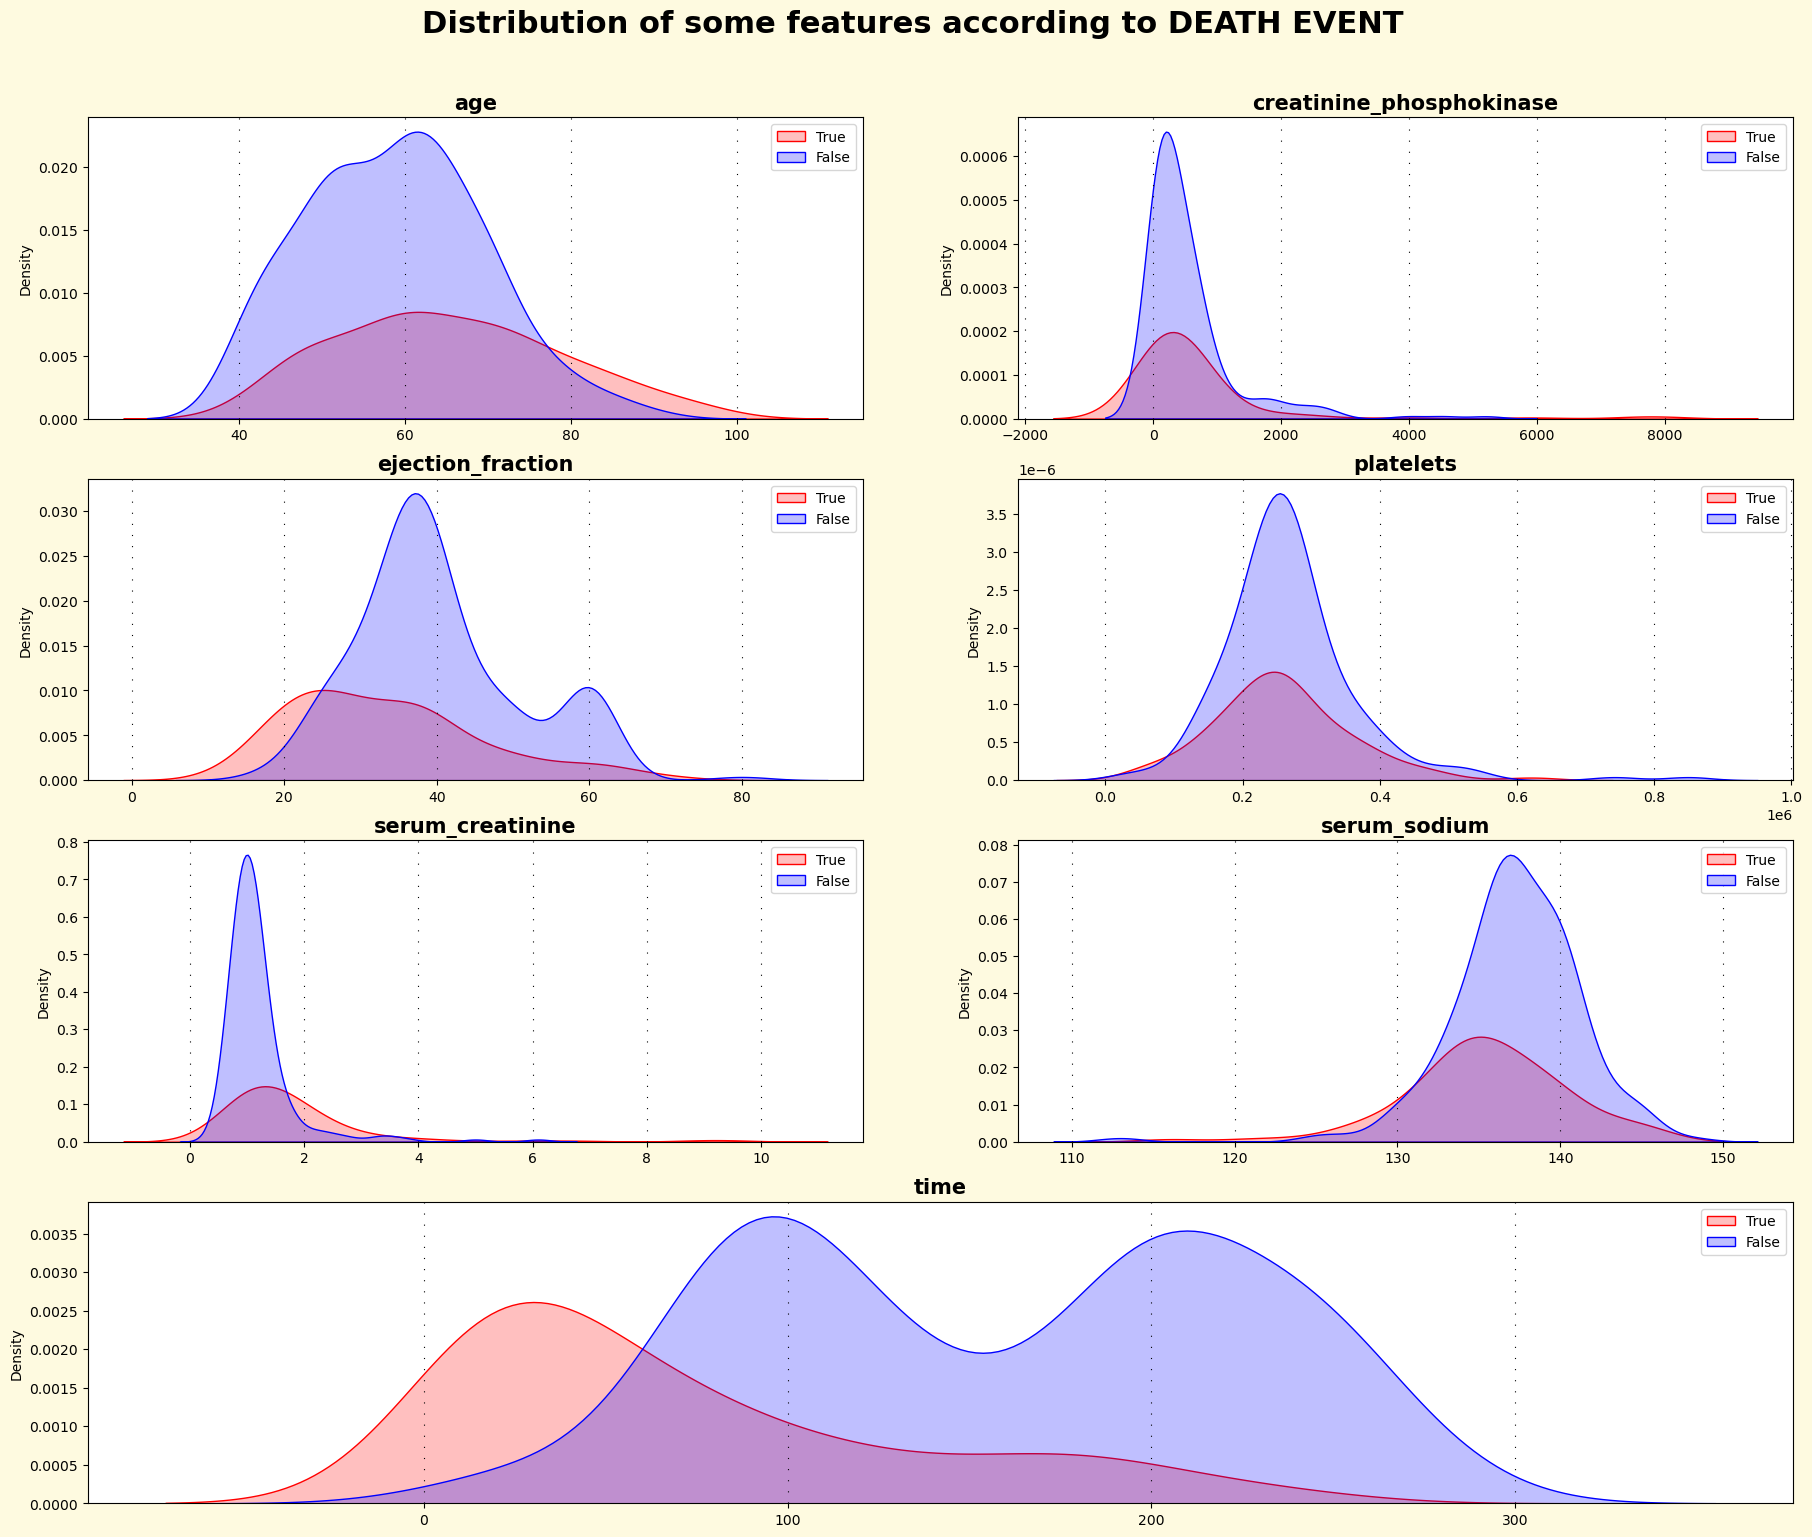

In [8]:
def plot_con_feat(df, ax, col_name, target='DEATH_EVENT'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.kdeplot(ax=ax,data=df,x=col_name, hue=target, fill=True, palette = ['blue','red'])
    ax.legend([True, False])
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(4,2)
axes = []

for i in range(4):
    for j in range(2):
        if i<3:
            ax = fig.add_subplot(gs[i,j])
            axes.append(ax)
        else:
            ax = fig.add_subplot(gs[i,:])
            axes.append(ax)
            break


fig.suptitle(t='Distribution of some features according to DEATH EVENT',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")


for ax,col_name in zip(axes,num_cols):
    plot_con_feat(df, ax, col_name)

plt.show()

**Correlation between features and 'DEATH_EVENT'**

In [9]:
df_corr = df.corr()
df_corr['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

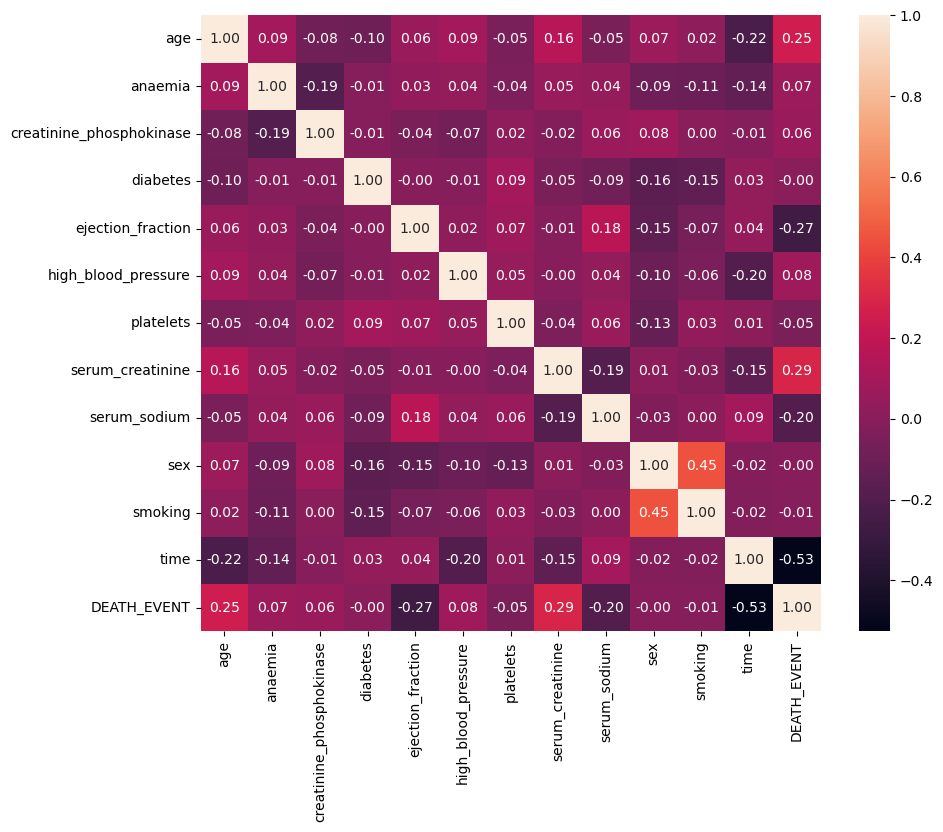

In [10]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.show()

**We found correlations among [platelets - smoking - sex - diabetes] and [DEATH_EVENT] are weak correlations**

SO we remove it..

In [11]:
rem_cols = ['platelets', 'smoking', 'sex', 'diabetes']

for e in rem_cols:
    if df[e].nunique()>5:
        num_cols.remove(e)
    else:
        cat_cols.remove(e)
        
df = df.drop(rem_cols, axis=1)

print("Categorical: ",cat_cols)
print("Numurical: ",num_cols)

Categorical:  ['anaemia', 'high_blood_pressure', 'DEATH_EVENT']
Numurical:  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


# 4) Pre-Processing

**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scaling in range [-1, 1]
standard_df = scaler.fit_transform(df[num_cols])
standard_df = pd.DataFrame(standard_df, columns=num_cols)
standard_df.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,1.264666,-4.682176,-1.577879


**Merged New Columns to Cetegorcal data**

In [13]:
df = standard_df.join(df[cat_cols])
df.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,DEATH_EVENT
0,1.192945,0.000166,-1.530560,0.490057,-1.504036,-1.629502,0,1,1
1,-0.491279,7.514640,-0.007077,-0.284552,-0.141976,-1.603691,0,0,1
2,0.350833,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785,0,0,1
3,-0.912335,-0.486071,-1.530560,0.490057,0.085034,-1.590785,1,0,1
4,0.350833,-0.435486,-1.530560,1.264666,-4.682176,-1.577879,1,0,1


**Separate Data**

In [14]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# 5) Modeling

**Importing Packages**

In [15]:
# model_selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression

**Get best seed for splitting**

In [16]:
the_best_seed = {}

for i in range(45):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    mdl = LogisticRegression()
    mdl.fit(x_train,y_train)
    the_best_seed[mdl.score(x_test, y_test)] = i
    
max_score = max(the_best_seed.keys())
max_seed = the_best_seed[max_score]

print("BEST SEED:", max_seed)

BEST SEED: 24


**Split data 80% trainset & 20% testset**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=max_seed) # max_seed = 24

**Preview of the first 5 rows of train data**

In [18]:
x_train.merge(y_train,left_index=True,right_index=True).head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,DEATH_EVENT
176,0.687678,0.864242,0.162199,-0.381379,-0.368986,0.216033,0,0,0
244,-0.575491,0.000166,-0.007077,0.393231,-0.595996,1.067818,0,0,0
187,-0.070223,1.356673,-1.107370,0.683709,1.674104,0.538678,0,0,1
172,0.771889,-0.424130,1.854958,-0.284552,1.901114,0.203127,1,1,0
211,-0.912335,0.000166,2.024234,-0.575031,0.766064,0.796795,0,1,0


**Preview of the first 5 rows of test data**

In [19]:
 x_test.merge(y_test,left_index=True,right_index=True).head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,DEATH_EVENT
179,-0.491279,0.261350,0.162199,-0.671857,0.766064,0.216033,0,0,0
196,-1.333392,0.000166,-0.007077,-0.207091,0.085034,0.706454,0,1,0
108,0.182411,0.365618,-0.007077,-0.284552,-0.823006,-0.545412,0,0,0
65,-0.070223,-0.530462,-1.530560,1.458319,-2.185066,-0.855152,0,0,1
183,1.192945,-0.498459,-0.007077,1.071014,-0.595996,0.409620,0,1,1


**Hyperparameter Tuning**

In [20]:
parameters = {'max_iter':[100, 200, 500], 'C':[1,2,5]}
lr = LogisticRegression()
mdl = GridSearchCV(lr, parameters)
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
mdl.best_params_

{'C': 2, 'max_iter': 100}

# 6) Validation

**Confusion Matrix**

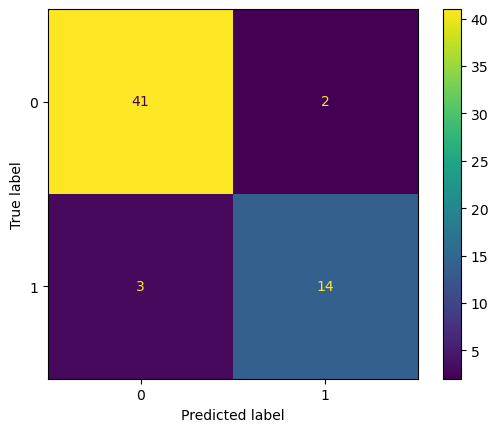

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Accuracy Score**

In [22]:
print(f'Accuracy score of Logistic Regression is {accuracy_score(y_test, y_pred)*100}%')

Accuracy score of Logistic Regression is 91.66666666666666%


**Classification Report**

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



**THANK YOU**

**if we help you, please upvote..**